In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
tf.__version__
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [35]:
train_num = data.train.num_examples
valid_num = data.validation.num_examples
test_num = data.test.num_examples
img_flatten = 784
img_size = 28
num_classes = 10
print("Size of:")
print("Training Dataset:",train_num)
print("Testing Dataset:",test_num)
print("Validation Dataset:",valid_num)

Size of:
Training Dataset: 55000
Testing Dataset: 10000
Validation Dataset: 5000


In [36]:
def get_weights_variable(layer_name):
    # Retrieve an existing variable named 'kernel' in the scope
    # with the given layer_name.
    # This is awkward because the TensorFlow function was
    # really intended for another purpose.
    with tf.variable_scope(layer_name, reuse=True):
        weights = tf.get_variable('kernel')
    return weights

def get_bias_variable(layer_name):
    with tf.variable_scope(layer_name,reuse=True):
        bias = tf.get_variable('bias')
    return bias

In [37]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

### Model 1
m1_conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m1_conv1')
m1_pool1 = tf.layers.max_pooling2d(inputs=m1_conv1,pool_size=2,strides=2)
m1_conv2 = tf.layers.conv2d(inputs=m1_pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m1_conv2')
m1_pool2 = tf.layers.max_pooling2d(inputs=m1_conv2,pool_size=2,strides=2)
m1_flat1 = tf.layers.flatten(m1_pool2)
m1_fc1 = tf.layers.dense(inputs=m1_flat1,units=128,activation=tf.nn.relu,name='m1_fc1')
m1_logits = tf.layers.dense(inputs=m1_fc1,units=num_classes,activation=None,name='m1_fc_out')
m1_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m1_logits)
m1_loss = tf.reduce_mean(m1_cross_entropy)
m1_softmax = tf.nn.softmax(logits=m1_logits)
m1_pred_op = tf.argmax(m1_softmax,dimension=1)
m1_acc_op = tf.reduce_mean(tf.cast(tf.equal(m1_pred_op, y_cls), tf.float32))
m1_optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
m1_train_op = m1_optimizer.minimize(m1_loss)

m1_weights_conv1 = get_weights_variable('m1_conv1')
m1_weights_conv2 = get_weights_variable('m1_conv2')
m1_weights_fc1 = get_weights_variable('m1_fc1')
m1_weights_fc_out = get_weights_variable('m1_fc_out')

m1_bias_conv1 = get_bias_variable('m1_conv1')
m1_bias_conv2 = get_bias_variable('m1_conv2')
m1_bias_fc1 = get_bias_variable('m1_fc1')
m1_bias_fc_out = get_bias_variable('m1_fc_out')

In [38]:
session = tf.Session()
session.run(tf.global_variables_initializer())

train_loss_list1 = []
train_acc_list1 = []
test_loss_list1 = []
test_acc_list1 = []

BATCH_SIZE = 64
for epoch in range(1):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_batch = data.train.next_batch(BATCH_SIZE)
        session.run(m1_train_op, feed_dict={x: x_batch,y: y_batch})
    train_loss, train_acc = session.run([m1_loss,m1_acc_op],feed_dict={x:x_batch,y:y_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc = session.run([m1_loss,m1_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
#     msg = "Epoch: {0:<1}, Train Loss: {1:>1.6}, Train Acc: {2:>6.1%}, Test Loss: {3:>1.6}, Test Acc: {4:>6.1%}"
#     print(msg.format(epoch, train_loss, train_acc, test_loss, test_acc))

m1_w_conv1,m1_w_conv2,m1_w_fc1,m1_w_fc_out = session.run([m1_weights_conv1,m1_weights_conv2,m1_weights_fc1,m1_weights_fc_out])
m1_b_conv1,m1_b_conv2,m1_b_fc1,m1_b_fc_out = session.run([m1_bias_conv1,m1_bias_conv2,m1_bias_fc1,m1_bias_fc_out])

In [39]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

### Model 2
m2_conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m2_conv1')
m2_pool1 = tf.layers.max_pooling2d(inputs=m2_conv1,pool_size=2,strides=2)
m2_conv2 = tf.layers.conv2d(inputs=m2_pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m2_conv2')
m2_pool2 = tf.layers.max_pooling2d(inputs=m2_conv2,pool_size=2,strides=2)
m2_flat1 = tf.layers.flatten(m2_pool2)
m2_fc1 = tf.layers.dense(inputs=m2_flat1,units=128,activation=tf.nn.relu,name='m2_fc1')
m2_logits = tf.layers.dense(inputs=m2_fc1,units=num_classes,activation=None,name='m2_fc_out')
m2_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m2_logits)
m2_loss = tf.reduce_mean(m2_cross_entropy)
m2_softmax = tf.nn.softmax(logits=m2_logits)
m2_pred_op = tf.argmax(m2_softmax,dimension=1)
m2_acc_op = tf.reduce_mean(tf.cast(tf.equal(m2_pred_op, y_cls), tf.float32))
m2_optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
m2_train_op = m2_optimizer.minimize(m2_loss)

m2_weights_conv1 = get_weights_variable('m2_conv1')
m2_weights_conv2 = get_weights_variable('m2_conv2')
m2_weights_fc1 = get_weights_variable('m2_fc1')
m2_weights_fc_out = get_weights_variable('m2_fc_out')

m2_bias_conv1 = get_bias_variable('m2_conv1')
m2_bias_conv2 = get_bias_variable('m2_conv2')
m2_bias_fc1 = get_bias_variable('m2_fc1')
m2_bias_fc_out = get_bias_variable('m2_fc_out')

In [40]:
session = tf.Session()
session.run(tf.global_variables_initializer())

train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []

BATCH_SIZE = 1024
for epoch in range(1):
    for j in range(int(data.train.num_examples/BATCH_SIZE)):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        session.run(m2_train_op, feed_dict={x: x_batch,y: y_true_batch})
    train_loss, train_acc = session.run([m2_loss,m2_acc_op],feed_dict={x:x_batch,y:y_true_batch})
    train_loss_list2.append(train_loss)
    train_acc_list2.append(train_acc)
    test_loss, test_acc = session.run([m2_loss,m2_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list2.append(test_loss)
    test_acc_list2.append(test_acc)
#     msg = "Epoch: {0:<1}, Train Loss: {1:>1.6}, Train Acc: {2:>6.1%}, Test Loss: {3:>1.6}, Test Acc: {4:>6.1%}"
#     print(msg.format(epoch, train_loss, train_acc, test_loss, test_acc))
    
m2_w_conv1,m2_w_conv2,m2_w_fc1,m2_w_fc_out = session.run([m2_weights_conv1,m2_weights_conv2,m2_weights_fc1,m2_weights_fc_out])
m2_b_conv1,m2_b_conv2,m2_b_fc1,m2_b_fc_out = session.run([m2_bias_conv1,m2_bias_conv2,m2_bias_fc1,m2_bias_fc_out])

In [44]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

m3_w_conv1 = tf.placeholder(tf.float32,shape=[5,5,1,8])
m3_b_conv1 = tf.placeholder(tf.float32,shape=[8])
m3_w_conv2 = tf.placeholder(tf.float32,shape=[5,5,8,8])
m3_b_conv2 = tf.placeholder(tf.float32,shape=[8])
m3_w_fc1 = tf.placeholder(tf.float32,shape=[392,128])
m3_b_fc1 = tf.placeholder(tf.float32,shape=[128])
m3_w_fc_out = tf.placeholder(tf.float32,shape=[128,10])
m3_b_fc_out = tf.placeholder(tf.float32,shape=[10])

m3_conv1 = tf.nn.conv2d(input_x,filters=m3_w_conv1,padding='SAME')
m3_conv1 = tf.nn.relu(tf.nn.bias_add(m3_conv1,m3_b_conv1))
m3_pool1 = tf.nn.max_pool2d(m3_conv1,2,2,'SAME')
m3_conv2 = tf.nn.conv2d(m3_pool1,m3_w_conv2,padding='SAME')
m3_conv2 = tf.nn.relu(tf.nn.bias_add(m3_conv2,m3_b_conv2))
m3_pool2 = tf.nn.max_pool2d(m3_conv2,2,2,'SAME')
m3_flat1 = tf.layers.flatten(m3_pool2)
m3_fc1 = tf.nn.relu(tf.add(tf.matmul(m3_flat1,m3_w_fc1),m3_b_fc1))
m3_logits = tf.add(tf.matmul(m3_fc1,m3_w_fc_out),m3_b_fc_out)

m3_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m3_logits)
m3_loss = tf.reduce_mean(m3_cross_entropy)

# Accuracy
m3_softmax = tf.nn.softmax(logits=m3_logits)
m3_pred_op = tf.argmax(m3_softmax,dimension=1)
m3_acc_op = tf.reduce_mean(tf.cast(tf.equal(m3_pred_op, y_cls), tf.float32))

session = tf.Session()
for alpha in np.arange(-1,2,0.05):
    w_conv1 = (1-alpha)*m1_w_conv1 + alpha*m2_w_conv1
    w_conv2 = (1-alpha)*m1_w_conv2 + alpha*m2_w_conv2
    w_fc1 = (1-alpha)*m1_w_fc1 + alpha*m2_w_fc1
    w_fc_out = (1-alpha)*m1_w_fc_out + alpha*m2_w_fc_out
    
    b_conv1 = (1-alpha)*m1_b_conv1 + alpha*m2_b_conv1
    b_conv2 = (1-alpha)*m1_b_conv2 + alpha*m2_b_conv2
    b_fc1 = (1-alpha)*m1_b_fc1 + alpha*m2_b_fc1
    b_fc_out = (1-alpha)*m1_b_fc_out + alpha*m2_b_fc_out
    
    train_loss,train_acc = session.run([m3_loss,m3_acc_op],feed_dict={x:data.train.images,y:data.train.labels,m3_w_conv1:w_conv1, m3_w_conv2:w_conv2, m3_w_fc1:w_fc1, m3_w_fc_out:w_fc_out,m3_b_conv1:b_conv1,m3_b_conv2:b_conv2,m3_b_fc1:b_fc1,m3_b_fc_out:b_fc_out})
    test_loss,test_acc = session.run([m3_loss,m3_acc_op],feed_dict={x:data.test.images,y:data.test.labels,m3_w_conv1:w_conv1, m3_w_conv2:w_conv2, m3_w_fc1:w_fc1, m3_w_fc_out:w_fc_out,m3_b_conv1:b_conv1,m3_b_conv2:b_conv2,m3_b_fc1:b_fc1,m3_b_fc_out:b_fc_out})
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

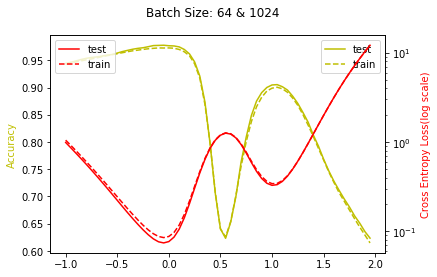

In [48]:
fig,axs1 = plt.subplots()
fig.suptitle('Batch Size: 64 & 1024')
alpha_list = np.arange(-1,2,0.05)
axs1.plot(alpha_list,test_acc_list,c='y')
axs1.plot(alpha_list,train_acc_list,'y--')
axs1.set_ylabel('Accuracy')
axs1.legend(['test','train'])
axs1.yaxis.label.set_color('y')
axs2 = axs1.twinx()
axs2.plot(alpha_list,test_loss_list,c='r')
axs2.plot(alpha_list,train_loss_list,'r--')
axs2.set_yscale('log')
axs2.set_ylabel('Cross Entropy Loss(log scale)')
axs2.legend(['test','train'])
axs2.yaxis.label.set_color('r')

In [83]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

### Model 1
m1_conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m1_conv1')
m1_pool1 = tf.layers.max_pooling2d(inputs=m1_conv1,pool_size=2,strides=2)
m1_conv2 = tf.layers.conv2d(inputs=m1_pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m1_conv2')
m1_pool2 = tf.layers.max_pooling2d(inputs=m1_conv2,pool_size=2,strides=2)
m1_flat1 = tf.layers.flatten(m1_pool2)
m1_fc1 = tf.layers.dense(inputs=m1_flat1,units=128,activation=tf.nn.relu,name='m1_fc1')
m1_logits = tf.layers.dense(inputs=m1_fc1,units=num_classes,activation=None,name='m1_fc_out')
m1_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m1_logits)
m1_loss = tf.reduce_mean(m1_cross_entropy)
m1_softmax = tf.nn.softmax(logits=m1_logits)
m1_pred_op = tf.argmax(m1_softmax,dimension=1)
m1_acc_op = tf.reduce_mean(tf.cast(tf.equal(m1_pred_op, y_cls), tf.float32))
m1_optimizer = tf.train.AdamOptimizer(learning_rate=1e-2)
m1_train_op = m1_optimizer.minimize(m1_loss)

m1_weights_conv1 = get_weights_variable('m1_conv1')
m1_weights_conv2 = get_weights_variable('m1_conv2')
m1_weights_fc1 = get_weights_variable('m1_fc1')
m1_weights_fc_out = get_weights_variable('m1_fc_out')

m1_bias_conv1 = get_bias_variable('m1_conv1')
m1_bias_conv2 = get_bias_variable('m1_conv2')
m1_bias_fc1 = get_bias_variable('m1_fc1')
m1_bias_fc_out = get_bias_variable('m1_fc_out')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

BATCH_SIZE = 1024
n_batch = data.train.num_examples // BATCH_SIZE

for epoch in range(1):
    for batch in range(n_batch):
        x_batch, y_batch = data.train.next_batch(BATCH_SIZE)
        sess.run(m1_train_op, feed_dict={x: x_batch,y: y_batch})
    train_loss, train_acc = sess.run([m1_loss,m1_acc_op],feed_dict={x:x_batch,y:y_batch})
    train_loss_list1.append(train_loss)
    train_acc_list1.append(train_acc)
    test_loss, test_acc = sess.run([m1_loss,m1_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
    test_loss_list1.append(test_loss)
    test_acc_list1.append(test_acc)
#     msg = "Epoch: {0:<1}, Train Loss: {1:>1.6}, Train Acc: {2:>6.1%}, Test Loss: {3:>1.6}, Test Acc: {4:>6.1%}"
#     print(msg.format(epoch, train_loss, train_acc, test_loss, test_acc))

m1_w_conv1,m1_w_conv2,m1_w_fc1,m1_w_fc_out = sess.run([m1_weights_conv1,m1_weights_conv2,m1_weights_fc1,m1_weights_fc_out])
m1_b_conv1,m1_b_conv2,m1_b_fc1,m1_b_fc_out = sess.run([m1_bias_conv1,m1_bias_conv2,m1_bias_fc1,m1_bias_fc_out])

In [84]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

### Model 2
m2_conv1 = tf.layers.conv2d(inputs=input_x,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m2_conv1')
m2_pool1 = tf.layers.max_pooling2d(inputs=m2_conv1,pool_size=2,strides=2)
m2_conv2 = tf.layers.conv2d(inputs=m2_pool1,filters=8,kernel_size=5,padding="same",activation=tf.nn.relu,name='m2_conv2')
m2_pool2 = tf.layers.max_pooling2d(inputs=m2_conv2,pool_size=2,strides=2)
m2_flat1 = tf.layers.flatten(m2_pool2)
m2_fc1 = tf.layers.dense(inputs=m2_flat1,units=128,activation=tf.nn.relu,name='m2_fc1')
m2_logits = tf.layers.dense(inputs=m2_fc1,units=num_classes,activation=None,name='m2_fc_out')
m2_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m2_logits)
m2_loss = tf.reduce_mean(m2_cross_entropy)
m2_softmax = tf.nn.softmax(logits=m2_logits)
m2_pred_op = tf.argmax(m2_softmax,dimension=1)
m2_acc_op = tf.reduce_mean(tf.cast(tf.equal(m2_pred_op, y_cls), tf.float32))
m2_optimizer = tf.train.AdamOptimizer(learning_rate=1e-5)
m2_train_op = m2_optimizer.minimize(m2_loss)

m2_weights_conv1 = get_weights_variable('m2_conv1')
m2_weights_conv2 = get_weights_variable('m2_conv2')
m2_weights_fc1 = get_weights_variable('m2_fc1')
m2_weights_fc_out = get_weights_variable('m2_fc_out')

m2_bias_conv1 = get_bias_variable('m2_conv1')
m2_bias_conv2 = get_bias_variable('m2_conv2')
m2_bias_fc1 = get_bias_variable('m2_fc1')
m2_bias_fc_out = get_bias_variable('m2_fc_out')

sess = tf.Session()
sess.run(tf.global_variables_initializer())

BATCH_SIZE = 1024
n_batch = data.train.num_examples // BATCH_SIZE
train_loss_list2 = []
train_acc_list2 = []
test_loss_list2 = []
test_acc_list2 = []

for epoch in range(1):
    for batch in range(n_batch):
        x_batch, y_true_batch = data.train.next_batch(BATCH_SIZE)
        sess.run(m2_train_op, feed_dict={x: x_batch,y: y_true_batch})
        train_loss, train_acc = sess.run([m2_loss,m2_acc_op],feed_dict={x:x_batch,y:y_true_batch})
        train_loss_list2.append(train_loss)
        train_acc_list2.append(train_acc)
        test_loss, test_acc = sess.run([m2_loss,m2_acc_op],feed_dict={x:data.test.images,y:data.test.labels})
        test_loss_list2.append(test_loss)
        test_acc_list2.append(test_acc)
#     msg = "Epoch: {0:<1}, Train Loss: {1:>1.6}, Train Acc: {2:>6.1%}, Test Loss: {3:>1.6}, Test Acc: {4:>6.1%}"
#     print(msg.format(epoch, train_loss, train_acc, test_loss, test_acc))
    
m2_w_conv1,m2_w_conv2,m2_w_fc1,m2_w_fc_out = sess.run([m2_weights_conv1,m2_weights_conv2,m2_weights_fc1,m2_weights_fc_out])
m2_b_conv1,m2_b_conv2,m2_b_fc1,m2_b_fc_out = sess.run([m2_bias_conv1,m2_bias_conv2,m2_bias_fc1,m2_bias_fc_out])

In [85]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_flatten], name='x')
input_x = tf.reshape(x,[-1,img_size,img_size,1])
y = tf.placeholder(tf.float32, shape=[None, num_classes], name='y')
y_cls = tf.argmax(y,dimension=1)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

m3_w_conv1 = tf.placeholder(tf.float32,shape=[5,5,1,8])
m3_b_conv1 = tf.placeholder(tf.float32,shape=[8])
m3_w_conv2 = tf.placeholder(tf.float32,shape=[5,5,8,8])
m3_b_conv2 = tf.placeholder(tf.float32,shape=[8])
m3_w_fc1 = tf.placeholder(tf.float32,shape=[392,128])
m3_b_fc1 = tf.placeholder(tf.float32,shape=[128])
m3_w_fc_out = tf.placeholder(tf.float32,shape=[128,10])
m3_b_fc_out = tf.placeholder(tf.float32,shape=[10])

m3_conv1 = tf.nn.conv2d(input_x,filters=m3_w_conv1,padding='SAME')
m3_conv1 = tf.nn.relu(tf.nn.bias_add(m3_conv1,m3_b_conv1))
m3_pool1 = tf.nn.max_pool2d(m3_conv1,2,2,'SAME')
m3_conv2 = tf.nn.conv2d(m3_pool1,m3_w_conv2,padding='SAME')
m3_conv2 = tf.nn.relu(tf.nn.bias_add(m3_conv2,m3_b_conv2))
m3_pool2 = tf.nn.max_pool2d(m3_conv2,2,2,'SAME')
m3_flat1 = tf.layers.flatten(m3_pool2)
m3_fc1 = tf.nn.relu(tf.add(tf.matmul(m3_flat1,m3_w_fc1),m3_b_fc1))
m3_logits = tf.add(tf.matmul(m3_fc1,m3_w_fc_out),m3_b_fc_out)

m3_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=m3_logits)
m3_loss = tf.reduce_mean(m3_cross_entropy)

# Accuracy
m3_softmax = tf.nn.softmax(logits=m3_logits)
m3_pred_op = tf.argmax(m3_softmax,dimension=1)
m3_acc_op = tf.reduce_mean(tf.cast(tf.equal(m3_pred_op, y_cls), tf.float32))

with tf.Session() as sess:
    for alpha in np.arange(-1,2,0.05):
        w_conv1 = (1-alpha)*m1_w_conv1 + alpha*m2_w_conv1
        w_conv2 = (1-alpha)*m1_w_conv2 + alpha*m2_w_conv2
        w_fc1 = (1-alpha)*m1_w_fc1 + alpha*m2_w_fc1
        w_fc_out = (1-alpha)*m1_w_fc_out + alpha*m2_w_fc_out

        b_conv1 = (1-alpha)*m1_b_conv1 + alpha*m2_b_conv1
        b_conv2 = (1-alpha)*m1_b_conv2 + alpha*m2_b_conv2
        b_fc1 = (1-alpha)*m1_b_fc1 + alpha*m2_b_fc1
        b_fc_out = (1-alpha)*m1_b_fc_out + alpha*m2_b_fc_out

        train_loss,train_acc = sess.run([m3_loss,m3_acc_op],feed_dict={x:data.train.images,y:data.train.labels,m3_w_conv1:w_conv1, m3_w_conv2:w_conv2, m3_w_fc1:w_fc1, m3_w_fc_out:w_fc_out,m3_b_conv1:b_conv1,m3_b_conv2:b_conv2,m3_b_fc1:b_fc1,m3_b_fc_out:b_fc_out})
        test_loss,test_acc = sess.run([m3_loss,m3_acc_op],feed_dict={x:data.test.images,y:data.test.labels,m3_w_conv1:w_conv1, m3_w_conv2:w_conv2, m3_w_fc1:w_fc1, m3_w_fc_out:w_fc_out,m3_b_conv1:b_conv1,m3_b_conv2:b_conv2,m3_b_fc1:b_fc1,m3_b_fc_out:b_fc_out})
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

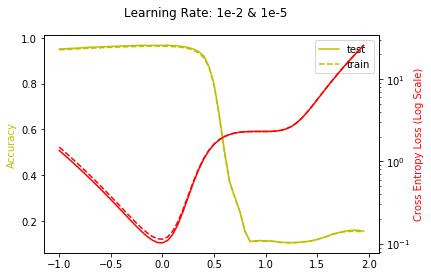

In [87]:
fig,axs1 = plt.subplots()
fig.suptitle('Learning Rate: 1e-2 & 1e-5')
alpha_list = np.arange(-1,2,0.05)
axs1.plot(alpha_list,test_acc_list,'y')
axs1.plot(alpha_list,train_acc_list,'y--')
axs1.legend(['test','train'])
axs1.set_ylabel('Accuracy')
axs1.yaxis.label.set_color('y')
axs2 = axs1.twinx()
axs2.plot(alpha_list,test_loss_list,'r')
axs2.plot(alpha_list,train_loss_list,'r--')
axs2.set_yscale('log')
axs2.set_ylabel('Cross Entropy Loss (Log Scale)')
axs2.yaxis.label.set_color('r')